In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('Transactions.xlsx')
data.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [3]:
data.isnull().sum()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.       0
Unnamed: 1                                                                                                                                                                         0
Unnamed: 2                                                                                                                                                                         0
Unnamed: 3                                                                                                                                                                         0
Unnamed: 4                                                                                                                                                                       360
Unnamed: 5                                                                                     

In [4]:
new_header = data.iloc[0]
data1 = data[1:]
data1.columns = new_header
data1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [5]:
data1.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [6]:
data1['online_order'] = data1['online_order'].value_counts()

<ipython-input-6-9668c9fb0a6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['online_order'] = data1['online_order'].value_counts()


In [7]:
data1['online_order'] = data1['online_order'].fillna(method = 'ffill')

<ipython-input-7-51f263400bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['online_order'] = data1['online_order'].fillna(method = 'ffill')


<AxesSubplot:xlabel='list_price'>

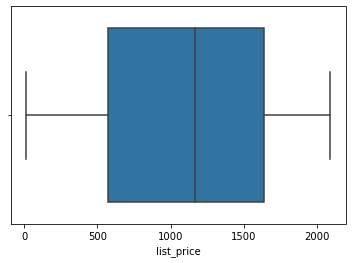

In [8]:
sns.boxplot(x = 'list_price', data = data1)

<AxesSubplot:xlabel='standard_cost'>

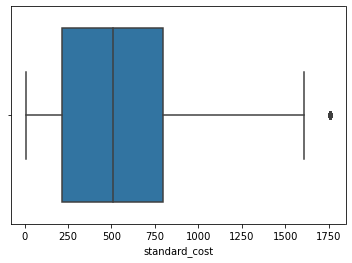

In [9]:
sns.boxplot(x = 'standard_cost', data = data1)

In [10]:
data1['standard_cost'].max()

1759.85

In [11]:
data1.dtypes

0
transaction_id              object
product_id                  object
customer_id                 object
transaction_date            object
online_order               float64
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                  object
standard_cost               object
product_first_sold_date     object
dtype: object

In [12]:
data1['list_price'] = data1['list_price'].astype(float)
data1['standard_cost'] = data1['standard_cost'].astype(float)
data1.dtypes

<ipython-input-12-d8d4a532c51b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['list_price'] = data1['list_price'].astype(float)
<ipython-input-12-d8d4a532c51b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['standard_cost'] = data1['standard_cost'].astype(float)


0
transaction_id              object
product_id                  object
customer_id                 object
transaction_date            object
online_order               float64
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date     object
dtype: object

In [13]:
data1['list_price'].describe()

count     20000.00
unique      296.00
top        2091.47
freq        465.00
Name: list_price, dtype: float64

In [12]:
data1['list_price'].dtypes

dtype('O')

In [14]:
data1['standard_cost'].dtypes

dtype('float64')

In [15]:
data1['standard_cost'].describe()

count     19803.00
unique      103.00
top         388.92
freq        465.00
Name: standard_cost, dtype: float64

In [15]:
data2 = data1.drop(['product_first_sold_date'], axis = 1)
data2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
1,1,2,2950,2017-02-25 00:00:00,9829.0,Approved,Solex,Standard,medium,medium,71.49,53.62
2,2,3,3120,2017-05-21 00:00:00,9829.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
3,3,37,402,2017-10-16 00:00:00,9829.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
4,4,88,3135,2017-08-31 00:00:00,9829.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
5,5,78,787,2017-10-01 00:00:00,9829.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


In [16]:
data1.dtypes

0
transaction_id              object
product_id                  object
customer_id                 object
transaction_date            object
online_order               float64
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date     object
dtype: object

In [16]:
print('list_price_blanks:', pd.isna(data1['list_price']).sum())

list_price_blanks: 0


In [17]:
print('standard_cost_blanks:', pd.isna(data1['standard_cost']).sum())

standard_cost_blanks: 197


In [18]:
data1['profit'] = data1['list_price'] - data1['standard_cost']
data1['profit'].describe()

<ipython-input-18-040f35620955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['profit'] = data1['list_price'] - data1['standard_cost']


count     19803.00
unique      103.00
top        1702.55
freq        465.00
Name: profit, dtype: float64

In [19]:
print('transaction_id_blanks:' , pd.isna(data1['transaction_id']).sum())

transaction_id_blanks: 0


In [21]:
print('customer_id_blanks:', pd.isna(data1['customer_id']).sum())

customer_id_blanks: 0


In [23]:
print('product_id_blanks:', pd.isna(data1['product_id']).sum())

product_id_blanks: 0


In [24]:
pd.notna(data1['customer_id'].unique()).sum()

3494

In [25]:
data1['transaction_date'].describe()

count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
Name: transaction_date, dtype: object

In [27]:
print('transaction_id_blanks:', pd.isna(data1['transaction_id']).sum())

transaction_id_blanks: 0


<AxesSubplot:xlabel='list_price'>

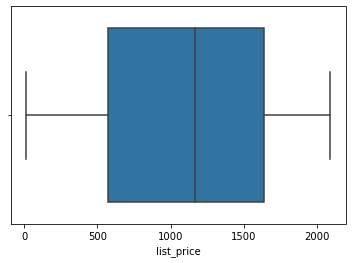

In [17]:
sns.boxplot(x = 'list_price', data=data1)


online_order [9829.]
blanks 0


(array([    0.,     0.,     0.,     0.,     0., 20000.,     0.,     0.,
            0.,     0.]),
 array([9828.5, 9828.6, 9828.7, 9828.8, 9828.9, 9829. , 9829.1, 9829.2,
        9829.3, 9829.4, 9829.5]),
 <BarContainer object of 10 artists>)

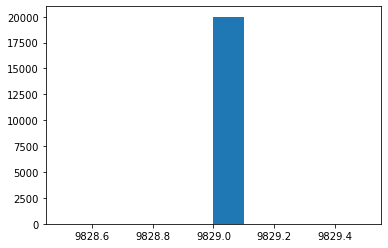

In [29]:
print('online_order', data1['online_order'].unique())
print('blanks', pd.isna(data1['online_order']).sum())
plt.hist(data1['online_order'][pd.notna(data1['online_order'])])

<AxesSubplot:xlabel='standard_cost'>

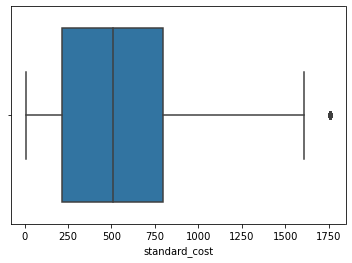

In [18]:
sns.boxplot(x = 'standard_cost', data=data1)

In [19]:
data1['list_price'].max()

2091.47

order_status: ['Approved' 'Cancelled']
blanks: 0


(array([19821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   179.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

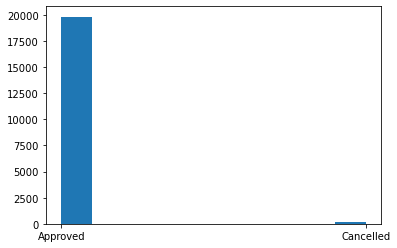

In [30]:
print('order_status:', data1['order_status'].unique())
print('blanks:', pd.isna(data1['order_status']).sum())
plt.hist(data1['order_status'][pd.notna(data1['order_status'])])

In [32]:
data1['order_status'][data1['order_status'] == 'Cancelled'].count()

179

brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
blank: 197


(array([4253.,    0., 2990.,    0., 3043.,    0., 2910.,    0., 3312.,
        3295.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

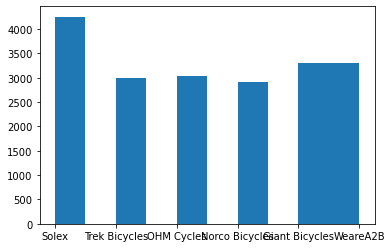

In [34]:
print('brand:', data1['brand'].unique())
print('blank:', pd.isna(data1['brand']).sum())
plt.hist(data1['brand'][pd.notna(data1['brand'])])

product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
blank: 197


(array([14176.,     0.,     0.,  3970.,     0.,     0.,   423.,     0.,
            0.,  1234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

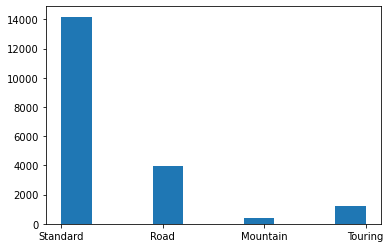

In [35]:
print('product_line:', data1['product_line'].unique())
print('blank:', pd.isna(data1['product_line']).sum())
plt.hist(data1['product_line'][pd.notna(data1['product_line'])])

In [20]:
data1.set_index('transaction_id', inplace = True)
data1

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25 00:00:00,9829.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,3,3120,2017-05-21 00:00:00,9829.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,37,402,2017-10-16 00:00:00,9829.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,88,3135,2017-08-31 00:00:00,9829.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
5,78,787,2017-10-01 00:00:00,9829.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24 00:00:00,9829.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823
19997,41,127,2017-11-09 00:00:00,9829.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,87,2284,2017-04-14 00:00:00,9829.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410


In [21]:
data3 = data2.drop(['product_id'], axis = 1)
data3.head()

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
1,1,2950,2017-02-25 00:00:00,9829.0,Approved,Solex,Standard,medium,medium,71.49,53.62
2,2,3120,2017-05-21 00:00:00,9829.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
3,3,402,2017-10-16 00:00:00,9829.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
4,4,3135,2017-08-31 00:00:00,9829.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
5,5,787,2017-10-01 00:00:00,9829.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


<AxesSubplot:xlabel='list_price'>

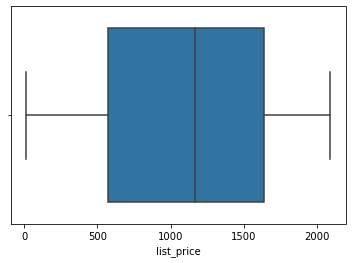

In [22]:
sns.boxplot(x = 'list_price', data=data3)

<AxesSubplot:xlabel='standard_cost'>

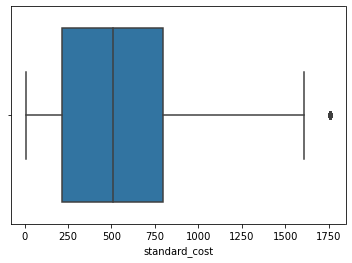

In [24]:
sns.boxplot(x = 'standard_cost', data=data3)

In [25]:
data2['customer_id'].max()

5034

In [29]:
std_cost = data3[data3['standard_cost']>1650].index
data3.drop(std_cost, inplace = True)
data3.head()

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
1,1,2950,2017-02-25 00:00:00,9829.0,Approved,Solex,Standard,medium,medium,71.49,53.62
2,2,3120,2017-05-21 00:00:00,9829.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
3,3,402,2017-10-16 00:00:00,9829.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
4,4,3135,2017-08-31 00:00:00,9829.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
5,5,787,2017-10-01 00:00:00,9829.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48


product_class: ['medium' 'low' 'high' nan]
blank: 197


(array([13826.,     0.,     0.,     0.,     0.,  2964.,     0.,     0.,
            0.,  3013.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

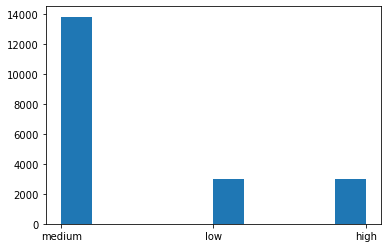

In [37]:
print('product_class:', data1['product_class'].unique())
print('blank:', pd.isna(data1['product_class']).sum())
plt.hist(data1['product_class'][pd.notna(data1['product_class'])])

product_size: ['medium' 'large' 'small' nan]
blank: 197


(array([12990.,     0.,     0.,     0.,     0.,  3976.,     0.,     0.,
            0.,  2837.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

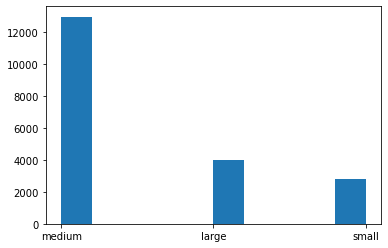

In [38]:
print('product_size:', data1['product_size'].unique())
print('blank:', pd.isna(data1['product_size']).sum())
plt.hist(data1['product_size'][pd.notna(data1['product_size'])])

In [39]:
print('product_first_sold_date_blanks:', pd.isna(data1['product_first_sold_date']).sum())

product_first_sold_date_blanks: 197


<AxesSubplot:xlabel='list_price'>

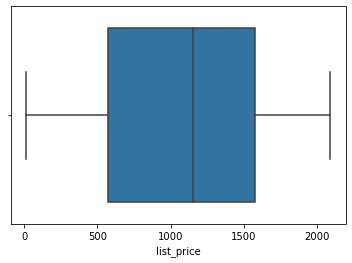

In [30]:
sns.boxplot(x = 'list_price', data=data3)


<AxesSubplot:xlabel='standard_cost'>

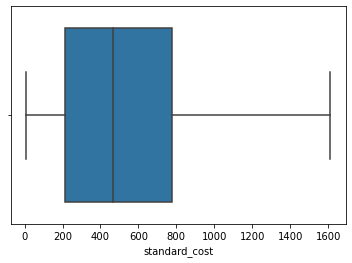

In [31]:
sns.boxplot(x = 'standard_cost', data=data3)

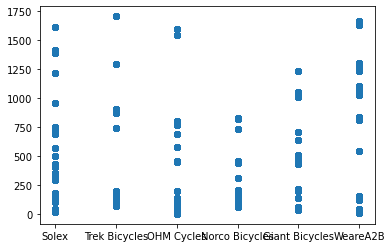

In [40]:
plt.scatter(data1['brand'][pd.notna(data1['brand'])], data1['profit'][pd.notna(data1['brand'])])

In [33]:
data3.to_excel('Final_KPMG_Data.xlsx')

NEW CUSTOMER LIST

In [34]:
track = pd.read_excel('CustomerList.xlsx')
track.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.71,0.8875,1.109375,0.942969,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.78,0.7800,0.975000,0.828750,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.65,0.6500,0.650000,0.650000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.04,1.3000,1.300000,1.300000,4.0,4,1.70312


In [36]:
new_header = track.iloc[0]
track1 = track[1:]
track1.columns = new_header
track1

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.71,0.8875,1.109375,0.942969,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.78,0.7800,0.975000,0.828750,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.65,0.6500,0.650000,0.650000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.04,1.3000,1.300000,1.300000,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.43,0.4300,0.537500,0.537500,4.0,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.61,0.6100,0.610000,0.610000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.70,0.7000,0.875000,0.743750,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.78,0.9750,0.975000,0.975000,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.56,0.7000,0.700000,0.595000,997.0,997,0.357


In [37]:
track1.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
Rank                                     0
Value                                    0
dtype: in

In [39]:
track1.columns.values

array(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', nan, nan, nan, nan, nan, 'Rank', 'Value'],
      dtype=object)

In [40]:
track1.columns = track1.columns.fillna('to_drop')
track1.drop('to_drop', axis = 1, inplace = True)
track1.head()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312


In [41]:
track1.columns.values

array(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'], dtype=object)

In [42]:
track1.dtypes

0
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
owns_car                               object
tenure                                 object
address                                object
postcode                               object
state                                  object
country                                object
property_valuation                     object
Rank                                   object
Value                                  object
dtype: object

In [43]:
track1['property_valuation'] = track1['property_valuation'].astype(float)
track1.dtypes

<ipython-input-43-6784c104826b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track1['property_valuation'] = track1['property_valuation'].astype(float)


0
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases     object
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                  object
address                                 object
postcode                                object
state                                   object
country                                 object
property_valuation                     float64
Rank                                    object
Value                                   object
dtype: object

<AxesSubplot:xlabel='property_valuation'>

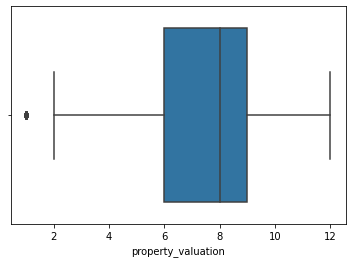

In [46]:
sns.boxplot(x = 'property_valuation', data = track1)

In [47]:
track1['property_valuation'].min()

1.0

In [50]:
std_prop = track1[track1['property_valuation']<2].index
track1.drop(std_cost, axis = 1, inplace = True)
track1.head()

KeyError: '[60 143 292 413 699 756 791 906 986 996 1114 1268 1369 1634 1907 1946 2038\n 2110 2156 2229 2299 2390 2507 2691 2742 2885 3255 3258 3369 3460 3517\n 3708 3733 3771 3819 3919 3997 4273 4416 4497 4520 4522 4613 4634 4656\n 4789 4844 4951 4973 5347 5531 5564 5628 5738 5803 5845 5865 6034 6070\n 6085 6195 6282 6338 6410 6458 6498 6513 6565 6929 6941 7133 7153 7197\n 7243 7423 7862 7890 8173 8317 8513 8532 8748 8799 8893 8899 8976 9325\n 9453 9461 9506 9535 9646 9658 9759 9762 9792 9924 10082 10182 10200 10362\n 10455 10805 10833 11186 11208 11260 11387 11487 11581 11591 11775 11917\n 12002 12028 12171 12391 12460 12565 12642 12731 12853 12897 12952 13181\n 13259 13298 13646 13683 13786 13966 14575 14644 14659 14731 14768 14772\n 14812 15083 15159 15177 15196 15221 15223 15323 15420 15468 15488 15527\n 16127 16255 16394 16509 16533 16605 16683 16746 17038 17280 17464 17555\n 17590 17593 17694 17745 17853 18003 18034 18046 18112 18125 18134 18153\n 18160 18257 18271 18317 18349 18402 18410 18423 18638 18654 18706 18741\n 18800 18806 18853 18891 19091 19191 19552 19706 19723 19750] not found in axis'

In [51]:
track1['property_valuation'].max()

12.0

In [52]:
track1.describe(include = 'all')

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
count,1000,971,1000,1000,983,894,835,1000,1000,1000,1000.0,1000,1000,1000,1000,1000.000000,1000.0,1000.0000
unique,940,961,3,100,961,184,9,3,1,2,23.0,1000,522,3,1,NaN,324.0,324.0000
top,Dorian,Hallt,Female,60,1965-07-03,Associate Professor,Financial Services,Mass Customer,N,No,9.0,5642 Debs Terrace,2145,NSW,Australia,NaN,760.0,0.6375
freq,3,2,513,20,2,15,203,508,1000,507,79.0,1,9,506,1000,NaN,13.0,13.0000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.397000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.758804,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN


In [53]:
track1.to_excel('NewCustomerList.xlsx')

In [54]:
track2 = pd.read_excel('NewCustomerList.xlsx')
track2.head()

,Unnamed: 0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


CUSTOMER DEMOGRAPHIC

In [60]:
demo = pd.read_excel('CustomerDemo.xlsx')
demo.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [61]:
new_header = demo.iloc[0]
demo1 = demo[1:]
demo1.columns = new_header
demo1

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [62]:
demo1 = demo1.drop(['default'], axis = 1)
demo1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8


In [85]:
demo1[demo1.duplicated()].sum()

0
customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

In [63]:
demo1['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [67]:
print('customer_id_blanks:', pd.isna(demo1['customer_id']).sum())
pd.notna(demo1['customer_id'].unique()).sum()

customer_id_blanks: 0


4000

In [68]:
print('first_name_blanks:', pd.isna(demo1['first_name']).sum())

first_name_blanks: 0


gender: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
blanks: 0


(array([1.000e+00, 0.000e+00, 1.872e+03, 0.000e+00, 2.037e+03, 0.000e+00,
        8.800e+01, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

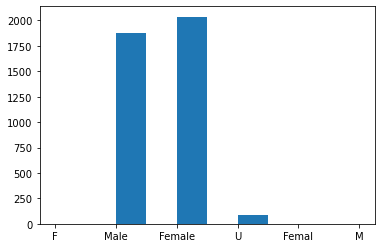

In [69]:
print('gender:', demo1['gender'].unique())
print('blanks:', pd.isna(demo1['gender']).sum())
plt.hist(demo1['gender'][pd.notna(demo1['gender'])])

In [72]:
demo1['past_3_years_bike_related_purchases'].describe()

count     4000
unique     100
top         16
freq        56
Name: past_3_years_bike_related_purchases, dtype: int64

In [73]:
print('past_3_years_bike_related_purchases:', pd.isna(demo1['past_3_years_bike_related_purchases']).sum())

past_3_years_bike_related_purchases: 0


In [75]:
demo1['DOB'].describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
Name: DOB, dtype: object

In [76]:
print('DOB_blanks:', pd.isna(demo1['DOB']).sum())

DOB_blanks: 87


In [79]:
print('job_title', demo1['job_title'].unique())
print('blanks:', pd.isna(demo1['job_title']).sum())

job_title ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office Assistant III'
 'Physical Therapy Assistant' 'Help Desk Operator' 'Web De

In [80]:
print('job_industry_category:', demo1['job_industry_category'].unique())
print('blanks:', pd.isna(demo1['job_industry_category']).sum())

job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
blanks: 656


wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
blanks: 0


(array([2000.,    0.,    0.,    0.,    0.,  979.,    0.,    0.,    0.,
        1021.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

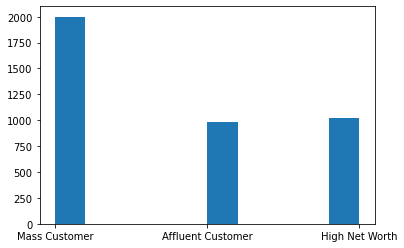

In [81]:
print('wealth_segment:', demo1['wealth_segment'].unique())
print('blanks:', pd.isna(demo1['wealth_segment']).sum())
plt.hist(demo1['wealth_segment'][pd.notna(demo1['wealth_segment'])])

deceased_indicator: ['N' 'Y']
blanks: 0


(array([3.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

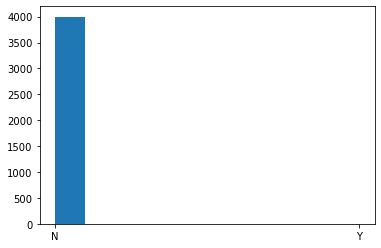

In [82]:
print('deceased_indicator:', demo1['deceased_indicator'].unique())
print('blanks:', pd.isna(demo1['deceased_indicator']).sum())
plt.hist(demo1['deceased_indicator'][pd.notna(demo1['deceased_indicator'])])

In [83]:
demo1['deceased_indicator'][demo1['deceased_indicator'] == 'Y'].count()

2

In [89]:
demo1['owns_car'][demo1['owns_car'] == 'Yes'].count()


2024

In [91]:
demo1['owns_car'][demo1['owns_car'] == 'No'].count()

1976

In [61]:
demo1.to_excel('Customer_Demographic.xlsx')

In [92]:
demo1['tenure'].describe()

count     3913
unique      22
top          7
freq       235
Name: tenure, dtype: int64

In [93]:
print('tenure_blanks:', pd.isna(demo1['tenure']).sum())

tenure_blanks: 87


In [62]:
demo2 = pd.read_excel('Customer_Demographic.xlsx')
demo2.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


CUSTOMER ADDRESS

In [43]:
addr = pd.read_excel('CustomerAddr.xlsx')
addr.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [44]:
new_header = addr.iloc[0]
addr1 = addr[1:]
addr1.columns = new_header
addr1

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [45]:
addr1['customer_id'].max()

4003

<AxesSubplot:xlabel='property_valuation'>

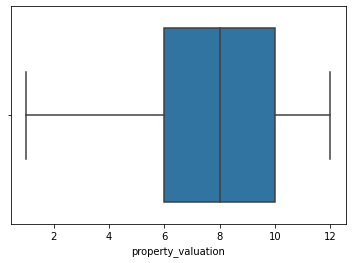

In [46]:
sns.boxplot(x = 'property_valuation', data = addr1)

In [47]:
addr1.to_excel('NewCustomerAddress.xlsx')

In [48]:
addr2 = pd.read_excel('NewCustomerAddress.xlsx')
addr2.head()

,Unnamed: 0,customer_id,address,postcode,state,country,property_valuation
0,1,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,6,9 Oakridge Court,3216,VIC,Australia,9


In [51]:
print('customer_id_blanks:', pd.notna(addr1['customer_id']).sum() )
print('customer_id_blanks:', pd.isna(addr1['customer_id']).sum() )

customer_id_blanks: 3999
customer_id_blanks: 0


In [52]:
print('address_blank:', pd.notna(addr1['address']).sum())
print('address_blanks:', pd.isna(addr1['address']).sum() )

address_blank: 3999
address_blanks: 0


In [53]:
print('postcode_blank:', pd.notna(addr1['postcode']).sum())
print('postcode_blank:', pd.isna(addr1['postcode']).sum())

postcode_blank: 3999
postcode_blank: 0


state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
blank: 0


(array([  86.,    0.,  838.,    0.,    0.,  939.,    0., 2054.,    0.,
          82.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

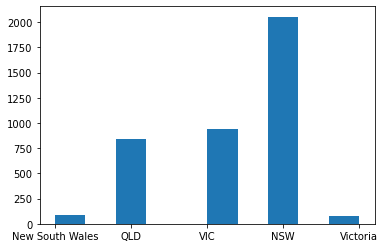

In [54]:
print('state:', addr1['state'].unique())
print('blank:', pd.isna(addr1['state']).sum())
plt.hist(addr1['state'][pd.notna(addr1['state'])])

In [56]:
print('country:', addr1['country'].unique())
print('blanks:', pd.notna(addr1['country']).sum())
print('blanks:', pd.isna(addr1['country']).sum())

country: ['Australia']
blanks: 3999
blanks: 0


In [57]:
addr1['property_valuation'].describe()

count     3999
unique      12
top          9
freq       647
Name: property_valuation, dtype: int64

property_valuation_blanks: 0


(array([297., 186., 214., 225., 238., 493., 646., 647., 577., 476.]),
 array([1.0, 2.1, 3.2, 4.300000000000001, 5.4, 6.5, 7.6000000000000005,
        8.700000000000001, 9.8, 10.9, 12.0], dtype=object),
 <BarContainer object of 10 artists>)

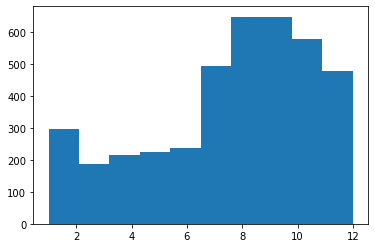

In [59]:
print('property_valuation_blanks:', pd.isna(addr1['property_valuation']).sum())
plt.hist(addr1['property_valuation'], bins = 10)

SUBMITTED BY :
SURMEET MOHANTY